In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from guided_filter_pytorch.guided_filter import FastGuidedFilter
from tqdm import tqdm



In [69]:
image_dir = 'Hands'


In [79]:
def images_iterable(image_dir, batch_size=10):
    """
    Defines an iterable for the images .jpg stored it in the image_dir and return the images 
    defined by the batch_size.

    Parameters
    ----------
    image_dir : str
        The images directory where the images are stored
    batch_size : int, optional
        The batch size of return images for each iteration
    """
    batch = []
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg'):
            file_path = os.path.join(image_dir, filename)
            with Image.open(file_path) as image:
                batch.append((filename, image.copy()))
                if len(batch) == batch_size:
                    yield batch
                    batch = []

    # Yield the remaining batch (if any)
    if batch:
        yield batch

image_gen = images_iterable(image_dir)


In [78]:
def gen_detailed_image(image_dir,
                    image_gen, 
                    image_detailed_dir_output = 'Hands_Detailed', 
                    image_filter_dir_output = 'Hands_Smooth', 
                    width=255, 
                    height = 255):
    """
    Generate the detailed images and smoothed images from an iterable images
    Apply the GaussianBlur filter and also divide the original image by the filtered
    to get the detailed image.

    Store both images in the image_detailed_dir_output and image_filter_dir_output directory
    If the directories doesn't exists, create it
    Parameters
    ----------
    image_dir : str
        Where the images are located
    image_gen : iterable
        An iterable for dataset images
    image_detailed_dir_output : str, optional
        The output directory for the detailed images
    image_filter_dir_output : str, optional
        The output directory for the smoothed images
    width : int, optional
        The width of the detailed and smoothed images
    height : int, optional
        The height of the detailed and smoothed images
    """
    eps = 1e-6
    # Check if the folder exists, and if not, create it
    if not os.path.exists(image_detailed_dir_output):
        os.makedirs(image_detailed_dir_output)
    if not os.path.exists(image_filter_dir_output):
        os.makedirs(image_filter_dir_output)

    progress_bar = tqdm(total=len(os.listdir(image_dir)))
    total_images = 0
    for i, batch in enumerate(image_gen):
        for j, (file, image) in enumerate(batch):
            total_images += 1
            image = np.array(image)
            filter = cv2.GaussianBlur(image, (25, 25), 15)

            glow = cv2.cvtColor(filter, cv2.COLOR_RGB2GRAY)
            high = np.clip((cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)+(eps/100)) / (glow+(eps/100))*255, 0, 255)

            path_detailed = os.path.join(image_detailed_dir_output, file)
            path_smoothed = os.path.join(image_filter_dir_output, file)
            
            cv2.imwrite(path_detailed, cv2.resize(high, (width, height)))
            cv2.imwrite(path_smoothed, cv2.resize(cv2.cvtColor(filter, cv2.COLOR_BGR2RGB), (width, height)))
            # Update the progress bar
        progress_bar.update(len(batch))
    # Close the progress bar
    progress_bar.close()
gen_detailed_image(image_dir, image_gen)

  1%|          | 110/11079 [00:02<04:07, 44.36it/s]


11079

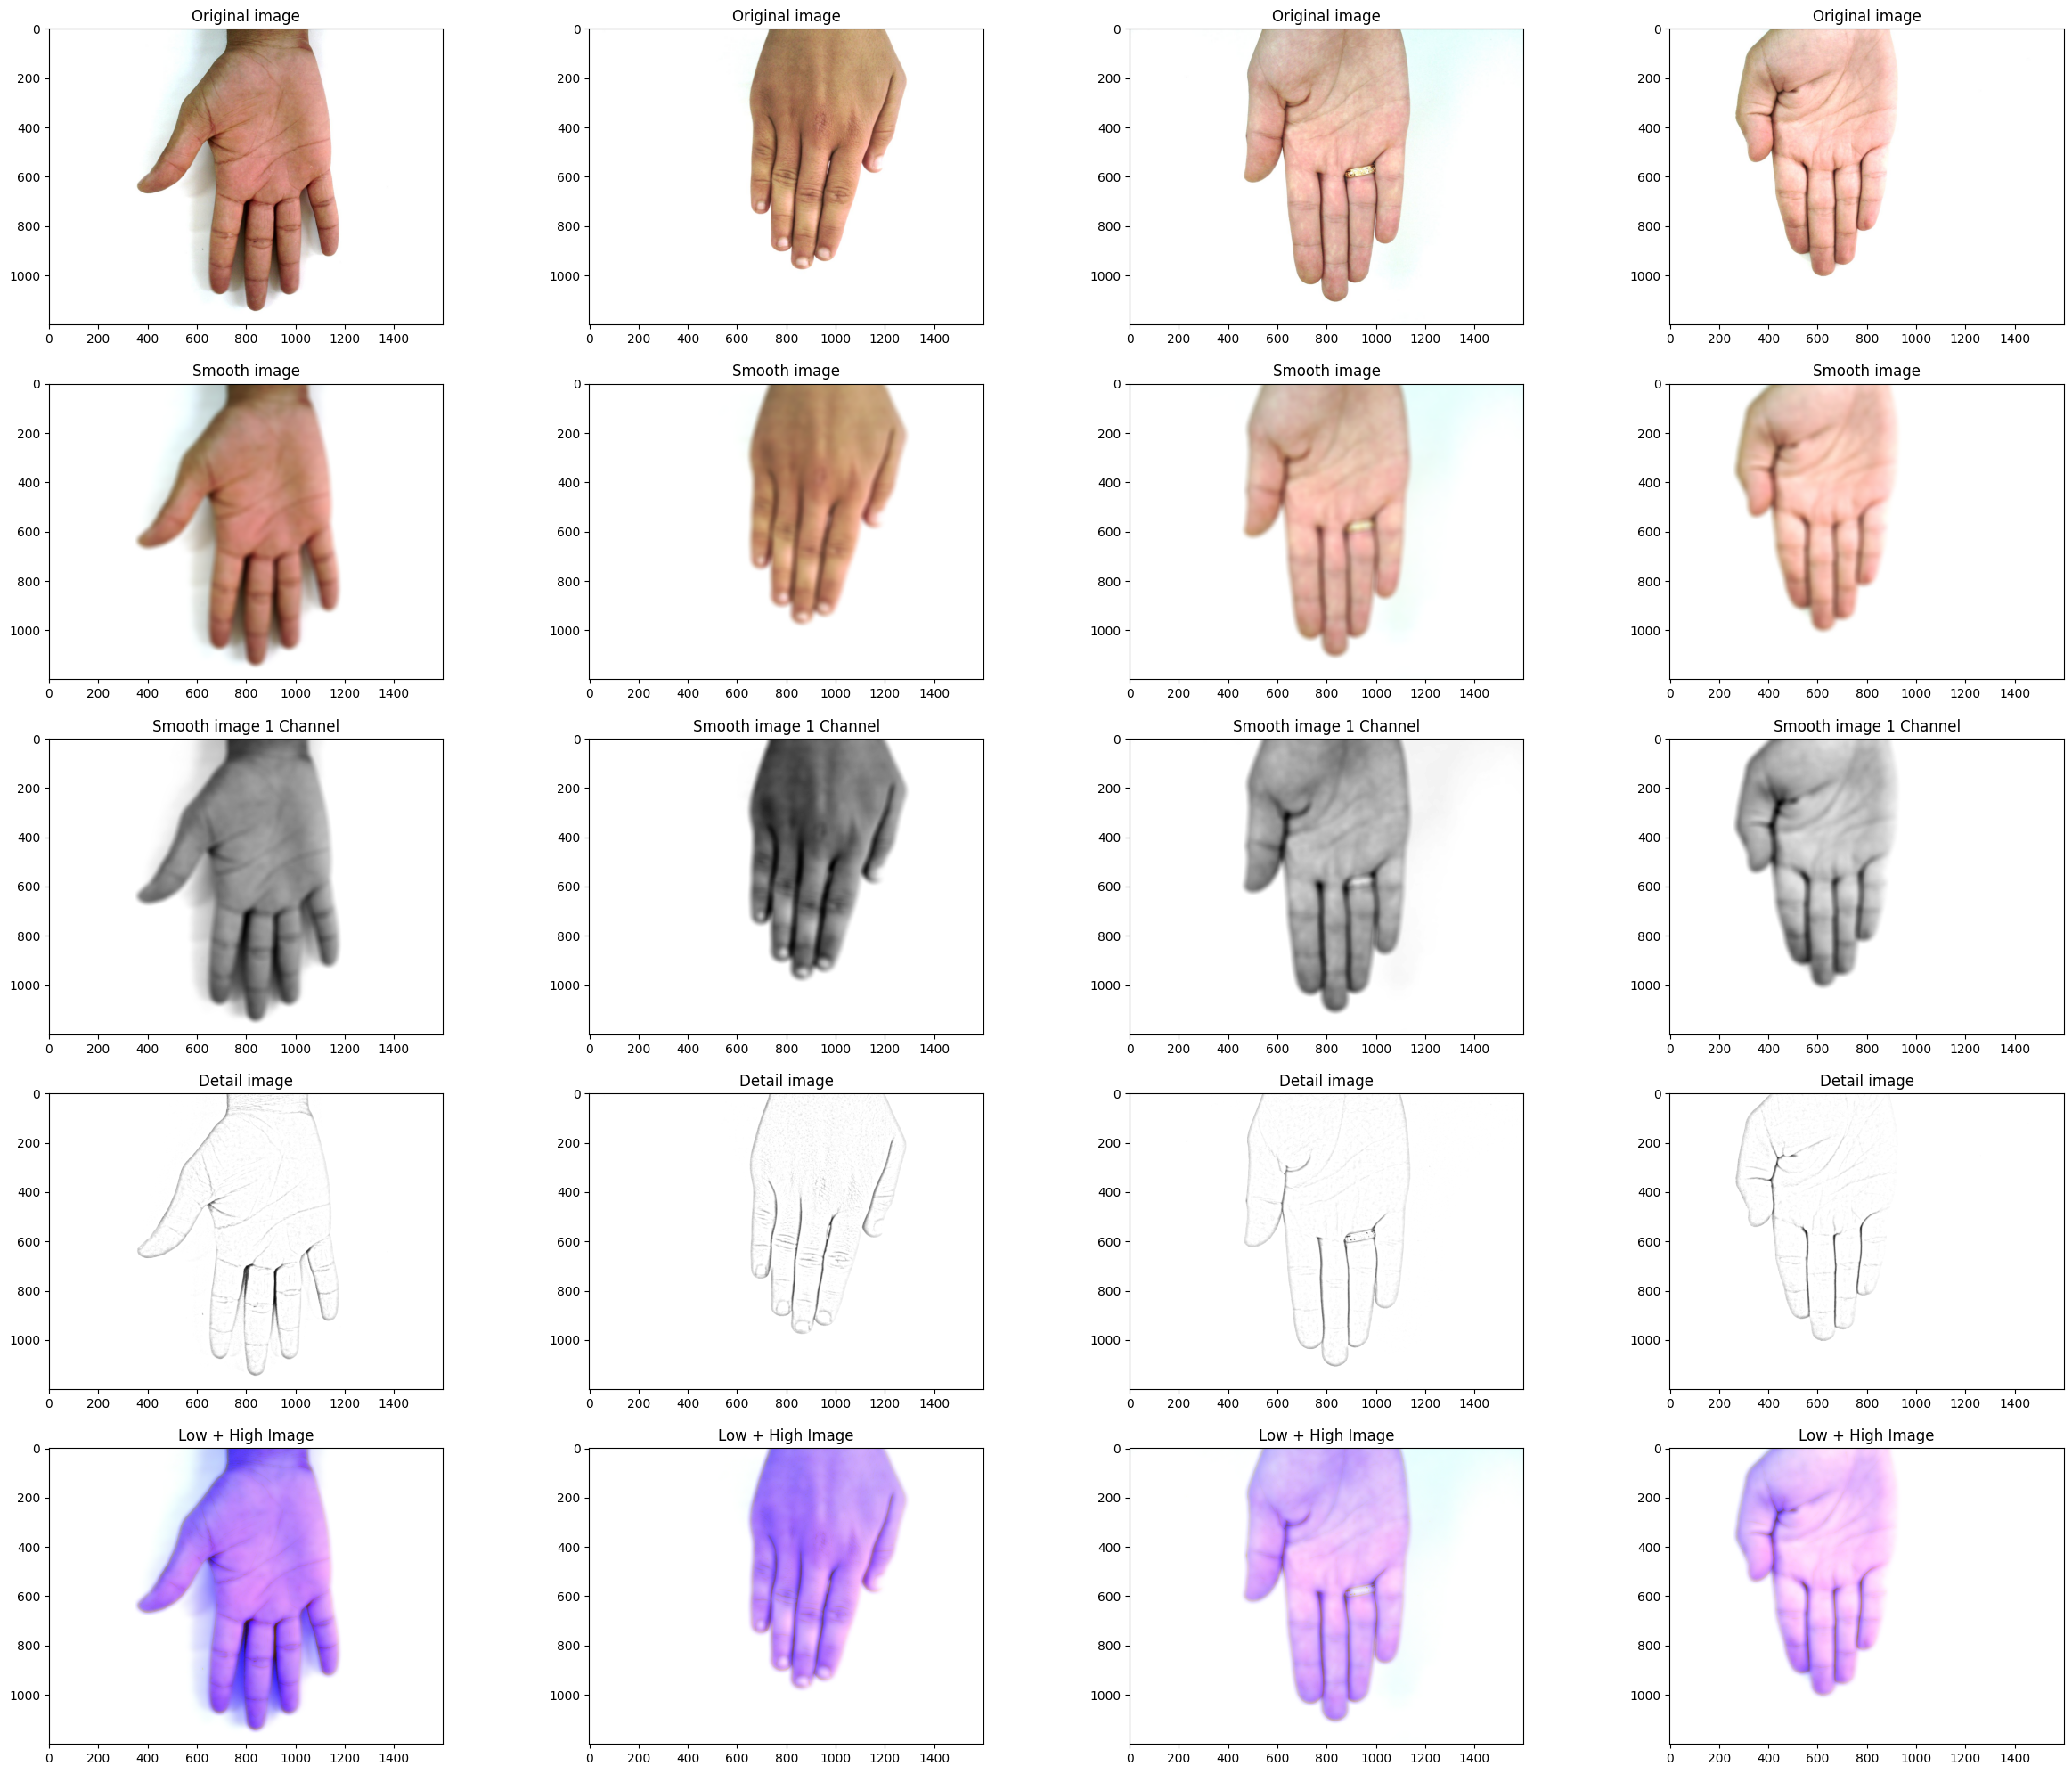

In [67]:
rows = 5  # Number of rows
cols = 4  # Number of columns

width  = 255
height = 255
eps = 0.0001
# Initialize the subplot
fig, axes = plt.subplots(rows, cols, figsize=(30, 25)) 
for i, batch in enumerate(image_gen):
    for j, (file, image) in enumerate(batch):
        if(j>=cols):
            break
        image = np.array(image)
        filter = cv2.GaussianBlur(image, (25, 25), 15)  # Adjust kernel size (e.g., (5, 5)) and sigma as needed
        #filter = cv2.bilateralFilter(image, d=50, sigmaColor=375, sigmaSpace=375)

        glow = cv2.cvtColor(filter, cv2.COLOR_RGB2GRAY)
        high = np.clip((cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)+(eps/100)) / (glow+(eps/100))*255, 0, 255)


        path_detailed = os.path.join(image_detailed_dir_output, file)
        path_smoothed = os.path.join(image_filter_dir_output, file)
        newImage = np.zeros(image.shape)
        newImage[:,:,:] = filter
        newImage[:,:,2] = high
        ax = axes[0, j]
        ax.imshow(image)
        ax.set_title("Original image")


        ax = axes[1, j]
        ax.imshow(filter)
        ax.set_title("Smooth image")

        ax = axes[2, j]
        ax.imshow(glow, cmap='gray')
        ax.set_title("Smooth image 1 Channel")

        ax = axes[3, j]
        ax.imshow(high, cmap='gray')
        ax.set_title("Detail image")

        ax = axes[4, j]
        ax.imshow(newImage.astype(np.uint8))
        ax.set_title("Low + High Image")
        
        cv2.imwrite(path_detailed, cv2.resize(high, (width, height)))
        cv2.imwrite(path_smoothed, cv2.resize(cv2.cvtColor(filter, cv2.COLOR_BGR2RGB), (width, height)))

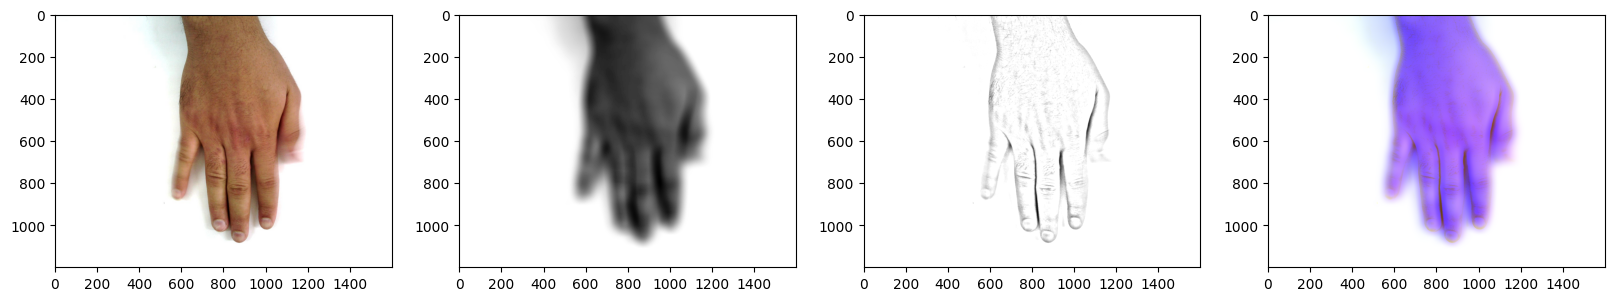

In [60]:
for i, batch in enumerate(image_gen):
    for j, (file, image) in enumerate(batch):
        fig, axes = plt.subplots(1, 4, figsize=(20, 8)) 
        image = np.array(image)
        filter = cv2.GaussianBlur(image, (55, 55), 25)  # Adjust kernel size (e.g., (5, 5)) and sigma as needed

        glow = cv2.cvtColor(filter, cv2.COLOR_RGB2GRAY)
        high = np.clip((cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)+(eps/100)) / (glow+(eps/100))*255, 0, 255)

        detailed_image = np.clip((image/filter)*255, 0, 255)
        newImage = np.zeros(image.shape)
        newImage[:,:,:] = filter
        newImage[:,:,2] = high
        axes[0].imshow(image)
        axes[1].imshow(glow, cmap='gray')
        axes[2].imshow(high, cmap='gray')
        axes[3].imshow(newImage.astype(np.uint8))
        break;
    break

In [19]:
x = torch.tensor([[1, 2, 3, 4]])
x.shape[1]


4